In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import DQN

import sys
sys.path.append('../..')
from iai_models import otrl

In [14]:
env = Monitor(gym.make("LunarLander-v3", render_mode="rgb_array"))

In [15]:
models = {
    "OCT": otrl.OTRLPretrained(f"json/oct.json"),
    "OPT": otrl.OTRLPretrained(f"json/opt_shelf.json"),
    "OPT-Class": otrl.OTRLPretrained(f"json/opt.json"),
    "Brick": otrl.TunnelVisionPolicy(0, "Nothing")
}

In [16]:
n_eps = 100
bins = range(-800, 210, 50)

Evaluating Pretrained . . .


c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object learning_rate. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code expected at least 16 arguments, got 15
  warnings.warn(
c:\Users\georg\miniconda3\envs\.conda_mit\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.p

Pretrained 136.26862763, 71.60651801988882
Evaluating OCT . . .
OCT -380.99315799, 191.40712860277682
Evaluating OPT . . .
OPT -488.36381810000006, 172.56615024261387
Evaluating OPT-Class . . .
OPT-Class -670.4011796899998, 65.32788359105719
Evaluating Brick . . .
Brick -127.98713630999997, 39.02395829038096


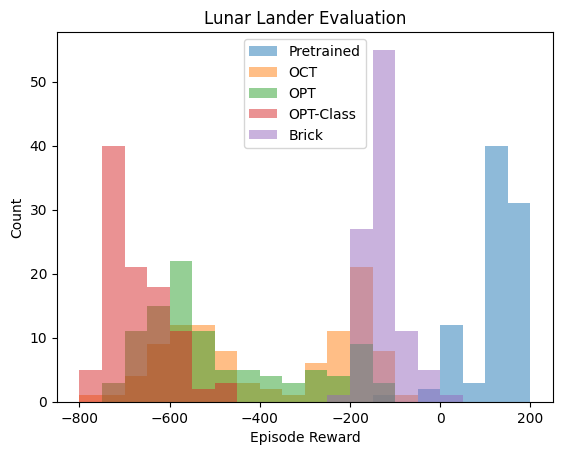

In [17]:
model_path = "../../rl-baselines3-zoo/rl-trained-agents/dqn/LunarLander-v2_1/LunarLander-v2.zip"
print("Evaluating Pretrained . . .")
rewards, lengths = evaluate_policy(
    DQN.load(model_path),
    env,
    n_eval_episodes=n_eps,
    return_episode_rewards=True
)
print(f"Pretrained {np.mean(rewards)}, {np.std(rewards)}")
plt.hist(rewards, bins=bins, alpha=0.5, label="Pretrained")

for name, mdl in models.items():
    print(f"Evaluating {name} . . .")
    rewards, lengths = mdl.evaluate(
        env,
        n_eval_episodes=n_eps,
        return_episode_rewards=True
    )
    print(f"{name} {np.mean(rewards)}, {np.std(rewards)}")
    plt.hist(rewards, bins=bins, alpha=0.5, label=name)

plt.legend()
plt.xlabel("Episode Reward")
plt.ylabel("Count")
plt.title("Lunar Lander Evaluation")
plt.show()

In [18]:
models["OCT"].render_episode(env, path="test.gif")

In [19]:
models["Brick"].render_episode(env, path="brick.gif")